# Introduction

McDonalds. The word synonymous with Fast food culture. The Big Mac, Cheeseburger, Egg McMuffin, Chicken McNuggets have been etched in annals of history.  However there lies a more pejorative connotation associated with these iconic foods - one of excessive unhealthiness and processed devilry. This was exacerbated by the release of the American documentary ***Super Size Me*** ( of which this notebook's title draws its inspiration from) to critical reception and a lasting impact of the film's emphasis on McDonald's supersize portions. 

However, this notebook will aim to take an empirical approach in evaluating the nutritional content of the various offerings provided in this McDonald's dataset and will ultimately let the data craft its story. I will start off with some standard data exploration and analytics after which I will proceed to play around with and plot interactive Plotly scatter plots of the various nutritional food metrics. 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

So much like every standard data exploration, let us load the data via the Pandas package and play around with it.  

In [19]:
menu = pd.read_csv('menu.csv')
menu.head(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8


**Quick checks on Data quality**

Always imperative to check first on the quality of the data - i.e whether there are any nulls or blanks in the columns/features, the row and column wise sizes as well as whether any of the numbers don't make sense (like having any infinities in the values. We can accomplish all these as such

In [20]:
# Check for Nulls
print(menu.isnull().any())
print("--------------------------------------")
# check for numbers
print(menu.describe())
print("--------------------------------------")

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool
--------------------------------------
          Cal

Cool, so it seems that our brief data quality checks have now all passed. So onto the data itself, we can see that a rich source of nutritional information is provided to us where we

# 1. Comparisons of Features via Contour and Correlation plots

First up on our analysis, let us take a look at how one feature feeds into the other. In particular I will plot a Contour or Kernel Density Estimation (KDE) plots which will provide the distribution of one feature to another.  This is to simply get a quick feel for the data that we have in a quantitative manner as well as to introduce the plotting capabilities of the brilliant Seaborn library.

**Contour plots**

To generate a Contour plot, it is a very simple Seaborn invocation of "kdeplot( )" as follows :

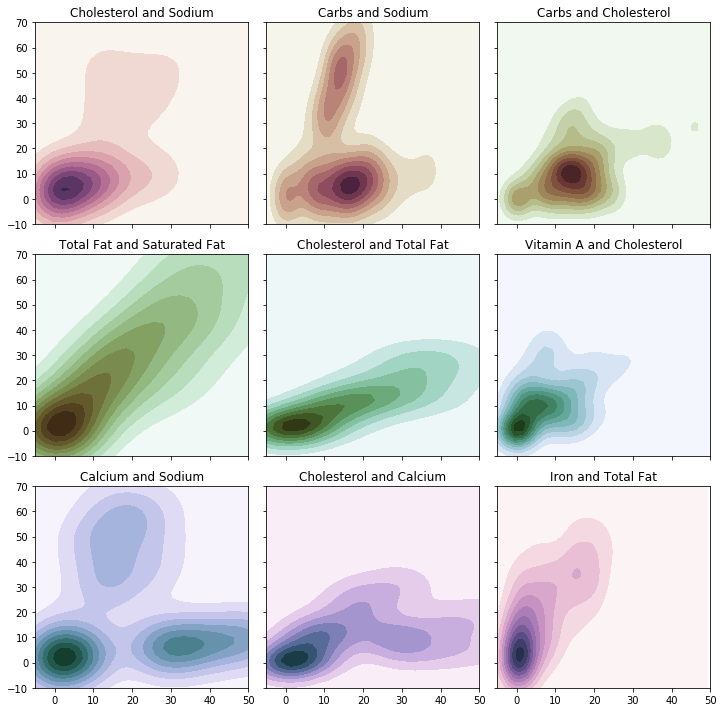

In [21]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot a random bivariate dataset
x = menu['Cholesterol (% Daily Value)'].values
y = menu['Sodium (% Daily Value)'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Cholesterol and Sodium')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)

# Generate and plot a random bivariate dataset
x = menu['Carbohydrates (% Daily Value)'].values
y = menu['Sodium (% Daily Value)'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set(xlim=(-5, 50), ylim=(-10, 70),  title = 'Carbs and Sodium')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)

# Generate and plot a random bivariate dataset
x = menu['Carbohydrates (% Daily Value)'].values
y = menu['Cholesterol (% Daily Value)'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set(xlim=(-5, 50), ylim=(-10, 70),  title = 'Carbs and Cholesterol')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)

# Generate and plot a random bivariate dataset
x = menu['Total Fat (% Daily Value)'].values
y = menu['Saturated Fat (% Daily Value)'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set(xlim=(-5, 50), ylim=(-10, 70),  title = 'Total Fat and Saturated Fat')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)

# Generate and plot a random bivariate dataset
x = menu['Total Fat (% Daily Value)'].values
y = menu['Cholesterol (% Daily Value)'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set(xlim=(-5, 50), ylim=(-10, 70),  title = 'Cholesterol and Total Fat')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)

# Generate and plot a random bivariate dataset
x = menu['Vitamin A (% Daily Value)'].values
y = menu['Cholesterol (% Daily Value)'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,2])
axes[1,2].set(xlim=(-5, 50), ylim=(-10, 70),  title = 'Vitamin A and Cholesterol')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)

# Generate and plot a random bivariate dataset
x = menu['Calcium (% Daily Value)'].values
y = menu['Sodium (% Daily Value)'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,0])
axes[2,0].set(xlim=(-5, 50), ylim=(-10, 70),  title = 'Calcium and Sodium')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)

# Generate and plot a random bivariate dataset
x = menu['Calcium (% Daily Value)'].values
y = menu['Cholesterol (% Daily Value)'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,1])
axes[2,1].set(xlim=(-5, 50), ylim=(-10, 70),  title = 'Cholesterol and Calcium')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)

# Generate and plot a random bivariate dataset
x = menu['Iron (% Daily Value)'].values
y = menu['Total Fat (% Daily Value)'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,2])
axes[2,2].set(xlim=(-5, 50), ylim=(-10, 70),  title = 'Iron and Total Fat')


f.tight_layout()

**Pearson Correlation plots**

Let us now plot the Pearson Correlation ( check how strongly related ) a feature is to the other. This time, I shall invoke the interactive plotting capabilities of the Plotly package by plotting a Heatmap of the correlation between features as follows :

In [22]:
data = [
    go.Heatmap(
        z= menu.ix[:,3:].corr().values,
        x=menu.columns.values,
        y=menu.columns.values,
        colorscale='Viridis',
        text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of all Nutritional metrics',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

As evinced from the correlation plots, one can already see features that obviously tie into one another (the more yellow sections of the plot). For example serving size and calories. 

However there are some surprising correlations which are pretty unintuitive. For example there are quite weak correlations between Total Fats and Saturated/Trans Fats although from a non-health expert's outset (like me), I would have thought it logical for one to contribute to the other. The heatmap also throws up interesting findings from the blotches of negative correlated plots (dark blue/black). For example it shows that Carbohydrates in general are quite negatively correlated to Trans Fat, Cholesterol, Sodium, Dietary Fiber and Vitamin A. That is a really whooping number of negative correlations from Carbs.

**Is there any possible issue with the data quality?**

Now since it is evident that the Carbohydrate column is quite negatively correlated with the other columns, I have just the slightest question in my mind with regards to the quality of the data for that metric. However, I could also very well be wrong in the sense that carbohydrate laden foods could tend not to have much else in them (apart from carbs that is) - i.e no Vitamins, salt, cholesterol and hence accounting for the negative correlations. Although as a counter to this counter, the amount of times I've eaten my MacDonald's French Fries and tasted the salt and the grease on them. Hmmn.

# 2. Analysing Nutritional Content per Item 

Having had a high-level overview of the different features/columns that are contained within our dataset, let us proceed to a more granular level of analysis. For any who follow my kernels, I am a big fan of interactive visualisations and plots and therefore I will now turn to the Plotly interactive visualisation package.

**Scatter Plot of Cholesterol (% Daily Value) per MacDonald's Item**


In [23]:
trace = go.Scatter(
    y = menu['Cholesterol (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Cholesterol (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = menu['Cholesterol (% Daily Value)'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Cholesterol (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Cholesterol (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

**Takeaway from the plot**

The most striking visuals from the scatter plot are the few large red plots close to the top. These circular plots were scaled such as that the higher the Cholesterol (% Daily value), the larger the plot thereby making for intuitive visuals. As we can see, the main culprit (red circle) is the MacDonald's Big Breakfast range, accounting for a whooping 185% of Cholesterol (% Daily value).

Further down from larger red plots, there are a greater number of yellow circular plots which can be attributed to items such as the Egg/Sausage McMuffin range contributing to nearly a day's worth of Cholesterol. 

**Most Cholesterol-laden item : Big Breakfast (Large Biscuit)** 

**Scatter Plot of Sodium (% Daily Value) per MacDonald's Item**

In [24]:
trace = go.Scatter(
    y = menu['Sodium (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Sodium (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = menu['Sodium (% Daily Value)'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Sodium (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Sodium (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

**Takeaway from the plot**

The scatter plots for Sodium (% Daily Value) seem to follow a similar distribution of points whereby MacDonald food items contributing the greatest amount of sodium are scaled largest. As evinced by the largest red circular plot, the 40-piece Chicken McNuggets are the greatest contributor to Sodium intake. 

The Big Breakfast range with Hotcakes follow up as a close second as a contributor to the sodium amount.

**Greatest amount of Sodium : Chicken McNuggets (40 piece)**

**Scatter Plot of Saturated Fat (% Daily Value) per MacDonald's Item**

In [25]:
trace = go.Scatter(
    y = menu['Saturated Fat (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Saturated Fat (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = menu['Saturated Fat (% Daily Value)'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Saturated Fat (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Saturated Fat (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

**Takeaway from the plots**

Whoa! These scatter plots now show a much larger distribution of red plots. This shows that there are quite a handful of MacDonald's food items which contain a dangerous amount of Saturated Fat, where one single food item can contain an amount close to the one's recommended daily allowance. For example the McFlurry with M&M candies or even the Frappe with Chocolate Chips.

**Greatest amount of Saturate Fats: McFlurry with M&M candies, Chicken McNuggets (40 piece), Frappe Chocolate Chip, Big Breakfast with Hotcakes etc**

**3D Scatter plots of Total Fat and Carbohydrate levels**

Let us play around with Plotly's capabilities and mix up our scatter plots a bit. Before we were plotting 2D scatter plots showing the distribution of various nutritional contents against the various food items. Let us now add in a 3rd dimension to the mix (3D Scatter plots) and observe what the distribution might look like by adding in the Category and plotting the scatter plots for carbohydrates and Total Fat content.

In [26]:
# 3D scatter plot for Total Fats
trace1 = go.Scatter3d(
    x=menu['Category'].values,
    y=menu['Item'].values,
    z=menu['Total Fat (% Daily Value)'].values,
    text=menu['Item'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
#         sizeref=750,
#         size= dailyValue['Cholesterol (% Daily Value)'].values,
        color = menu['Total Fat (% Daily Value)'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Carbohydrates (% Daily Value)')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

# 3D scatter plot for Carbohydrate
trace1 = go.Scatter3d(
    x=menu['Category'].values,
    y=menu['Item'].values,
    z=menu['Carbohydrates (% Daily Value)'].values,
    text=menu['Item'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
#         sizeref=750,
#         size= dailyValue['Cholesterol (% Daily Value)'].values,
        color = menu['Carbohydrates (% Daily Value)'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Carbohydrates (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Carbohydrates (% Daily Value)')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

Anyway having looked at nutritional metrics which carry largely negative connotations in society (Cholesterol, Sodium, Total Fat), let us balance this out and generate the scatter plots of nutritional metrics that carry more positive social weights . Namely Calcium, Iron, Dietary Fibre to name a few.

**Scatter Plots of Dietary Fiber, Calcium and Iron (% Daily Value) per MacDonald's Item**

In [27]:
trace = go.Scatter(
    y = menu['Dietary Fiber (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Dietary Fiber (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = menu['Dietary Fiber (% Daily Value)'].values,
        colorscale='Portland',
        reversescale = True,
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Dietary Fiber (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Dietary Fiber (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

# Calcium Scatter plots
trace = go.Scatter(
    y = menu['Calcium (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Calcium (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = menu['Calcium (% Daily Value)'].values,
        colorscale='Portland',
        reversescale = True,
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Calcium (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Calcium (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

# Iron Scatter plots
trace = go.Scatter(
    y = menu['Iron (% Daily Value)'].values,
    x = menu['Item'].values,
    mode='markers',
    marker=dict(
        size= menu['Iron (% Daily Value)'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = menu['Iron (% Daily Value)'].values,
        colorscale='Portland',
        reversescale = True,
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Iron (% Daily Value) per Item on the Menu',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Iron (% Daily Value)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

**Interactive Barplots of Calorie content per food item**

Finally to close out this section on analysing the nutritional content per item on the menu, let us generate some barplots. Since calories seems to be quite a sticking point with health guidelines and people in general, it may be informative to plot calorific plots for each food item in this dataset just to give readers a general overview of what each item on the MacDonald's menu entails.

In this plot, I will play around with some of Plotly's statistical plots which give it a Seaborn-type feel to the plots while keeping the interactivity. First we identify the column containing the calorie values and sort them as follows:

In [28]:
x, y = (list(x) for x in zip(*sorted(zip(menu.Calories.values, menu.Item.values), 
                                                            reverse = False)))

Then we invoke the **Bar** plotting functionality within Plotly as such

In [83]:
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Jet',
        reversescale = False
    ),
    name='Household savings, percentage of household disposable income',
    orientation='h',
)

layout = dict(
    title='Barplot of Calories in MacDonald Food Items',
     width = 1500, height = 2600,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

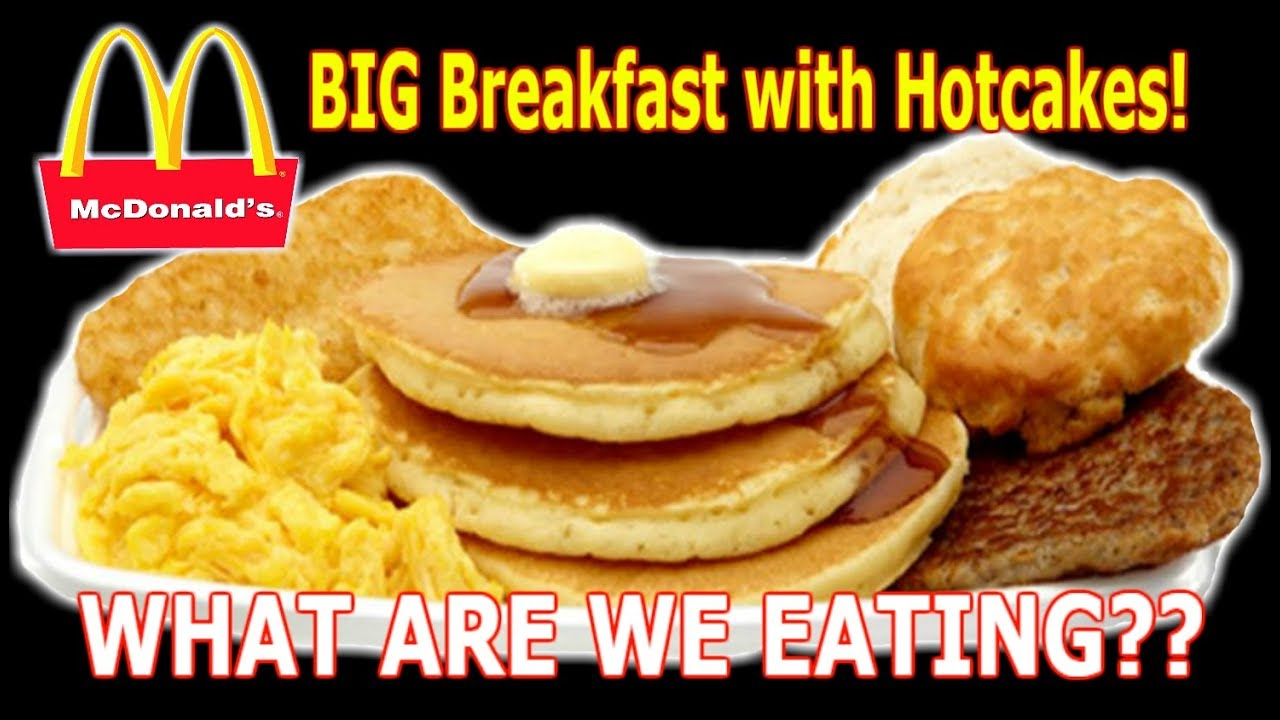

In [84]:
from IPython.display import Image
Image(filename='LargeBiscuit.jpg') 

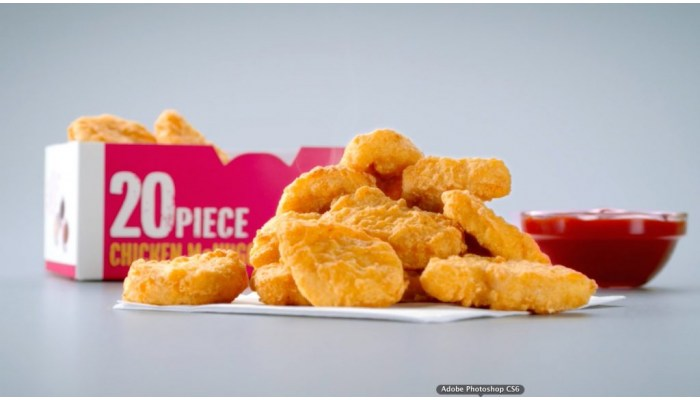

In [85]:
from IPython.display import Image
Image(filename='20piece.jpeg') 

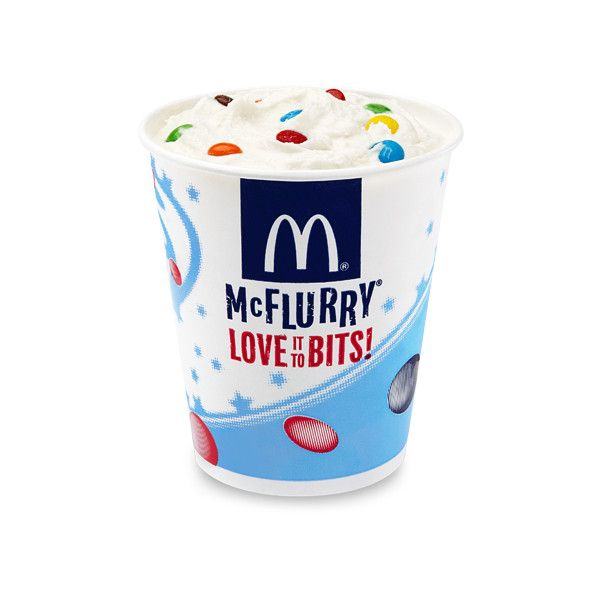

In [87]:
from IPython.display import Image
Image(filename='McFlurry.jpg')

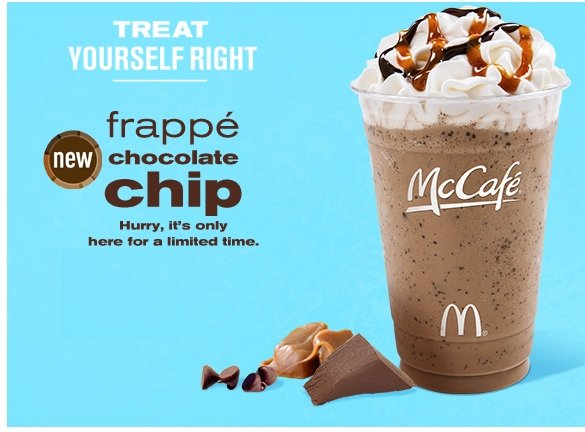

In [91]:
#Cafe???
from IPython.display import Image
Image(filename='Frappe.jpg')

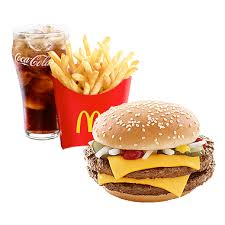

In [94]:
#Double Quarter Pounder with Cheese
from IPython.display import Image
Image(filename='Quarteirao.jpeg')

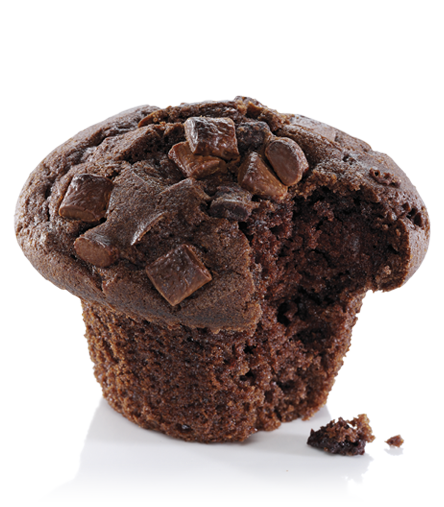

In [95]:
#Bolinho maldito
#Double Quarter Pounder with Cheese
from IPython.display import Image
Image(filename='Muffin.png')